In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
history = pd.read_csv("result/searching/38/history.csv").set_index('date')
history.index = pd.to_datetime(history.index)
history.sort_index(inplace=True)

In [48]:
(history.pnl > 0).astype(int).mean()

np.float64(1.0)

In [50]:
history

,Unnamed: 0,price,signal,position_size,position,TP,SL,close_price,close_time,pnl
date,,,,,,,,,,
2021-07-01 11:13:50.066487,0,1536.6,buy,1,384.150,1545.1,1535.1,1545.7,2021-07-01 13:35:16.514041,8.96
2021-07-09 10:24:04.909924,1,1517.4,buy,1,379.350,1525.9,1515.9,1526.0,2021-07-09 10:59:54.157182,8.46
2021-08-09 13:36:41.364565,2,1483.1,buy,1,370.775,1491.6,1481.6,1492.0,2021-08-09 14:13:17.221937,8.76


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([8.46 , 8.465, 8.47 , 8.475, 8.48 , 8.485, 8.49 , 8.495, 8.5  ,
        8.505, 8.51 , 8.515, 8.52 , 8.525, 8.53 , 8.535, 8.54 , 8.545,
        8.55 , 8.555, 8.56 , 8.565, 8.57 , 8.575, 8.58 , 8.585, 8.59 ,
        8.595, 8.6  , 8.605, 8.61 , 8.615, 8.62 , 8.625, 8.63 , 8.635,
        8.64 , 8.645, 8.65 , 8.655, 8.66 , 8.665, 8.67 , 8.675, 8.68 ,
        8.685, 8.69 , 8.695, 8.7  , 8.705, 8.71 , 8.715, 8.72 , 8.725,
        8.73 , 8.735, 8.74 , 8.745, 8.75 , 8.755, 8.76 , 8.765, 8.77 ,
        8.775, 8.78 , 8.785, 8.79 , 8.795, 8.8  , 8.8

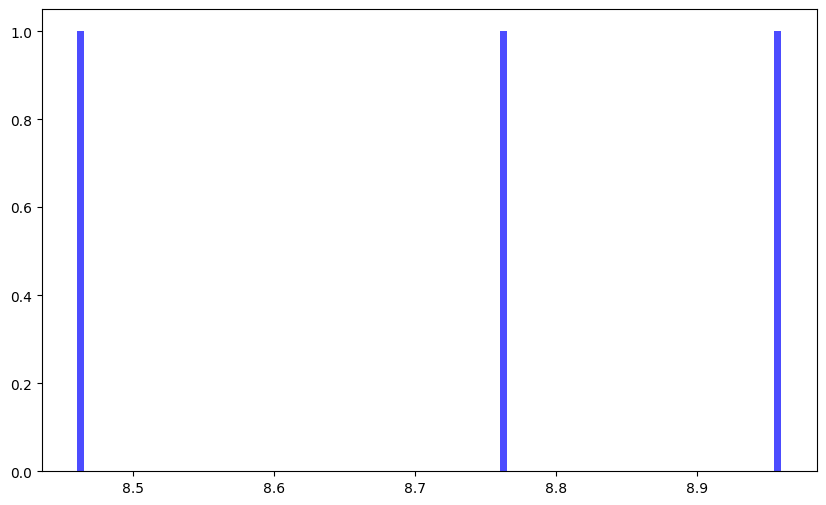

In [51]:
plt.figure(figsize=(10, 6))

plt.hist(history.pnl, bins=100, color='blue', alpha=0.7, label='pnl')

<Axes: xlabel='date'>

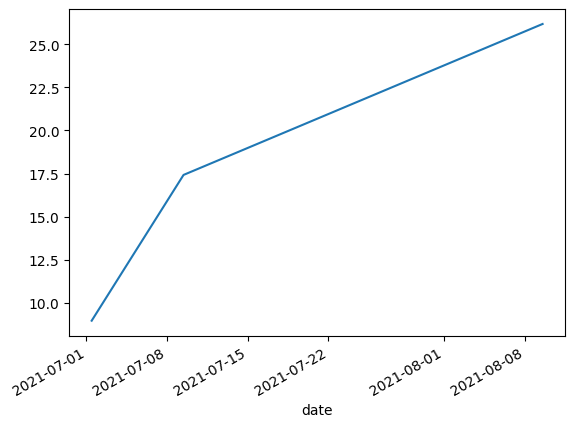

In [52]:
history.pnl.cumsum().plot()

In [ ]:
nav = pd.read_csv("optimizing/20/balance.csv").set_index('datetime')``
nav.index = pd.to_datetime(nav.index)
nav.plot()

FileNotFoundError: [Errno 2] No such file or directory: 'optimizing/20/balance.csv'

In [42]:
history.set_index("date", inplace=True)
history.index = pd.to_datetime(history.index)

KeyError: "None of ['date'] are in the columns"

In [43]:
long_hist = history[history.signal=="buy"].pnl.cumsum()
short_hist = history[history.signal=="sell"].pnl.cumsum()

In [44]:
long_asset = (long_hist + (6000))
short_asset = (short_hist + (6000))

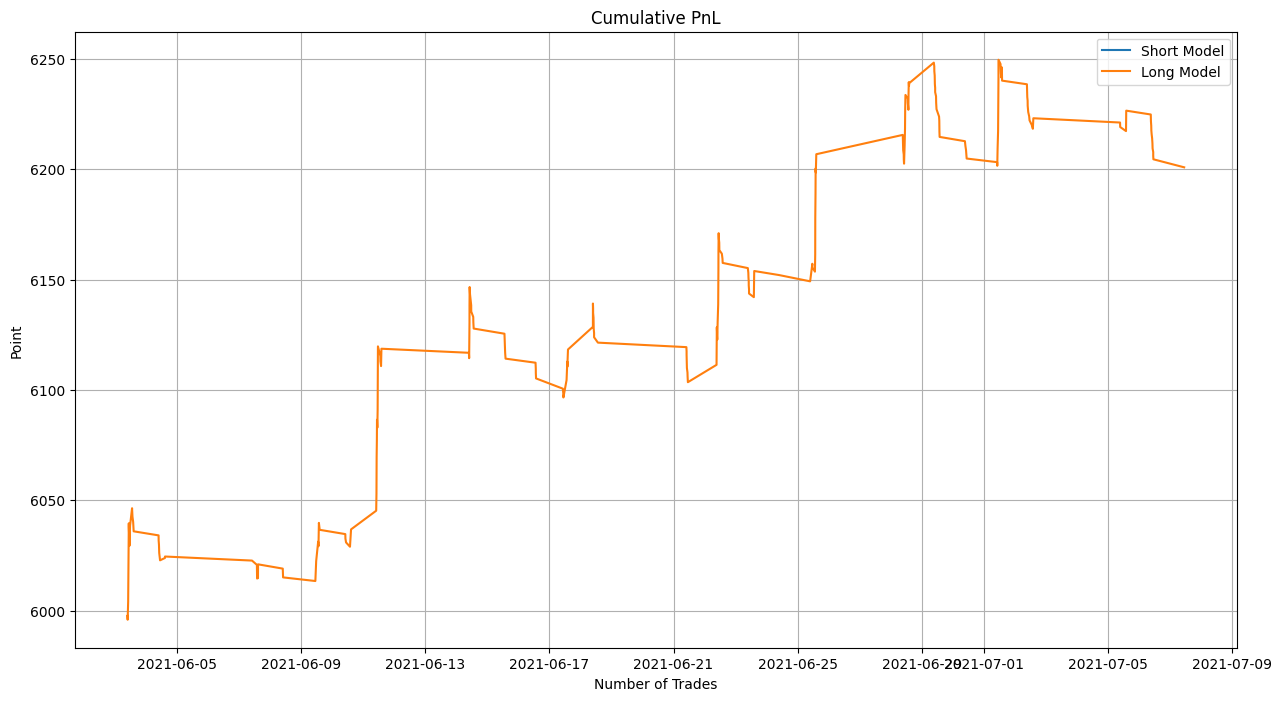

In [45]:
plt.figure(figsize=(15, 8))

plt.plot(short_asset, label="Short Model")
plt.plot(long_asset, label="Long Model")

plt.legend()
plt.grid()

plt.ylabel("Point")
plt.xlabel("Number of Trades")
plt.title("Cumulative PnL")
plt.show()

/var/folders/02/89l2rn514bncfw64vhtc11qm0000gn/T/ipykernel_76525/866128287.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = long_asset.resample("1D").last().pct_change()


<Axes: title={'center': 'Monthly Returns'}, xlabel='date'>

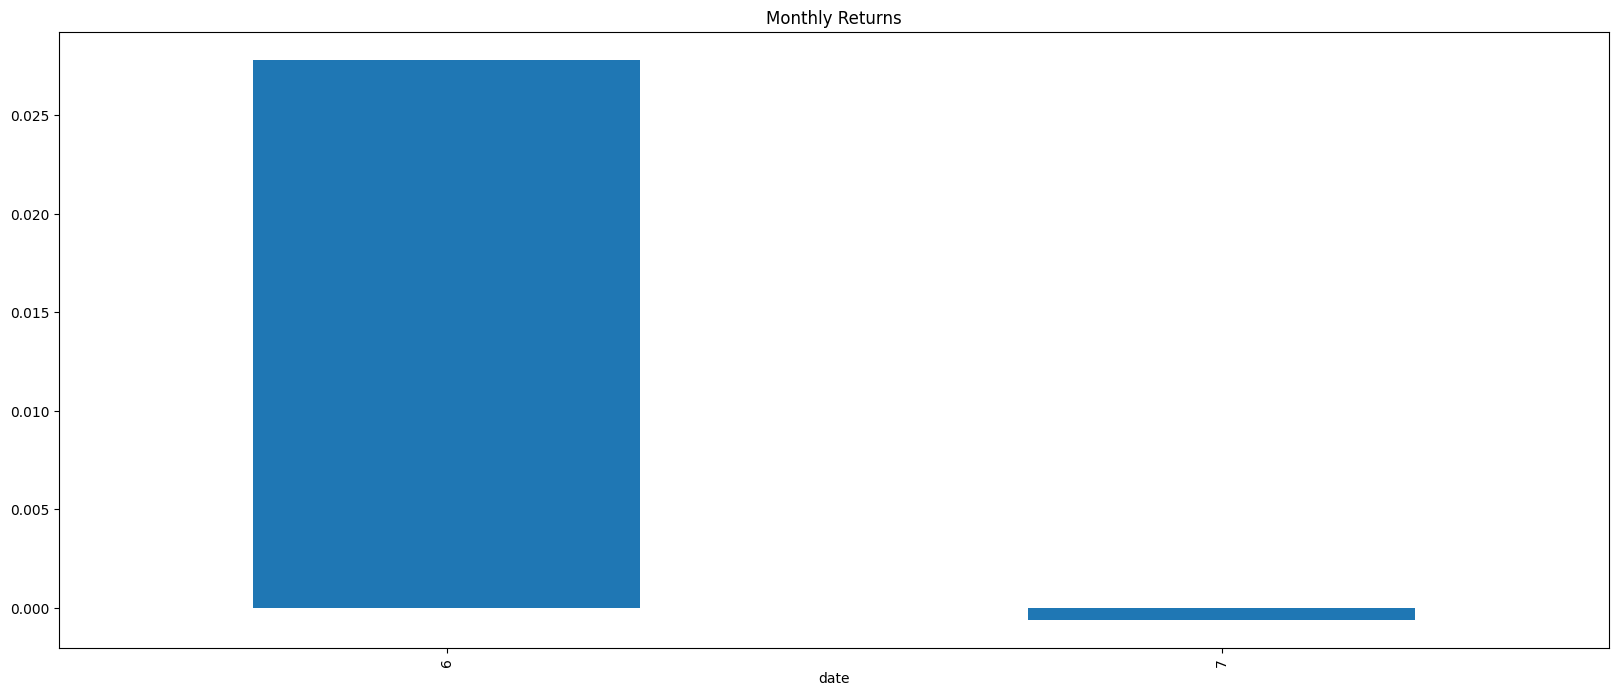

In [46]:
returns = long_asset.resample("1D").last().pct_change()
plt.figure(figsize=(20, 8))
returns.groupby(returns.index.month).sum().plot(kind="bar", title="Monthly Returns")

In [112]:
mean_return = short_asset.resample("1D").last().pct_change().mean()
std = short_asset.resample("1D").last().pct_change().std()

/tmp/ipykernel_2001/3531956252.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  mean_return = short_asset.resample("1D").last().pct_change().mean()
/tmp/ipykernel_2001/3531956252.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  std = short_asset.resample("1D").last().pct_change().std()


In [113]:
np.sqrt(252) * mean_return / std

np.float64(1.38355725714899)

In [114]:
yearly_return = mean_return * 25
yearly_return * 100

np.float64(3.77079323430496)

In [115]:
mdd = (long_asset / long_asset.cummax() - 1).min()
mdd

np.float64(-0.34028247885093155)

In [116]:
len(long_hist)

9888

In [100]:
(long_asset[-1] / long_asset[0] - 1) * 100

/tmp/ipykernel_2001/1661854102.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (long_asset[-1] / long_asset[0] - 1) * 100


np.float64(134.57562046254478)